Noisy Simulations and Benchmarking

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cirq

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

Simulating a circuit 100 times that prepares a single qubit in the $|1\rangle$ state with a 12% chance of depolarization throughout the whole circuit.

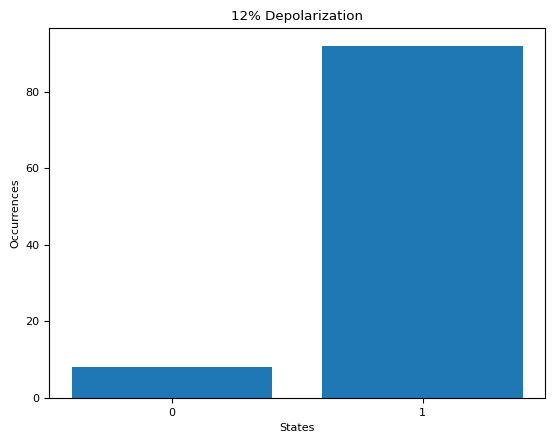

In [2]:
# Create the circuit
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()

circuit.append(cirq.X(qubit))
circuit.append(cirq.measure(qubit))


# Simulate the circuit with noise
noise = cirq.depolarize(0.12)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '12% Depolarization', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))
plt.show()

Simulating a circuit 100 times that prepares a single qubit in the $|+\rangle$ state with a 12% chance of depolarization throughout the whole circuit.

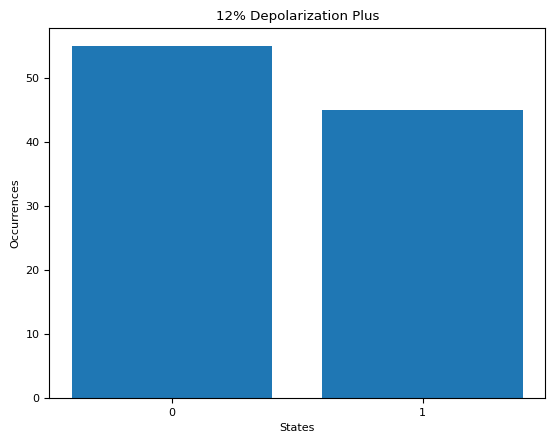

In [3]:
# Create the circuit
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubit))
circuit.append(cirq.measure(qubit))


# Simulate the circuit with noise
noise = cirq.depolarize(0.12)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)

# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '12% Depolarization Plus', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))
plt.show()

Simulating a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ (GHZ) state with no noise.

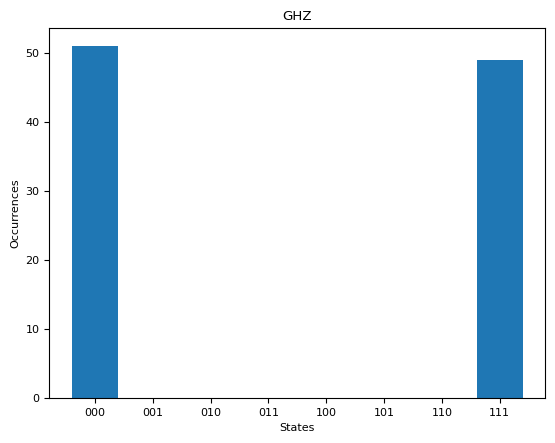

In [5]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = "q")
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))
circuit.append(cirq.measure(qubits))


# Simulate the circuit

sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

Simulating a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of depolarization throughout the whole circuit.

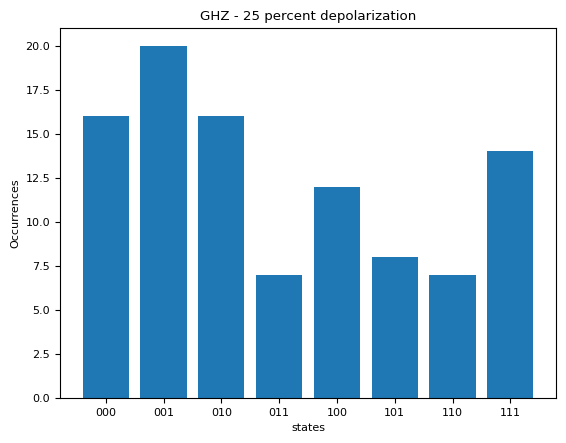

In [6]:
qubits = cirq.NamedQubit.range(3, prefix = "q")
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))

noise = cirq.depolarize(0.25)

sim = cirq.Simulator()

result = sim.run(circuit.with_noise(noise), repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "GHZ - 25 percent depolarization", xlabel = "states", ylabel = "Occurrences", tick_label = binary_labels(3))
plt.show()


Simulating a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of a phase flip throughout the whole circuit.

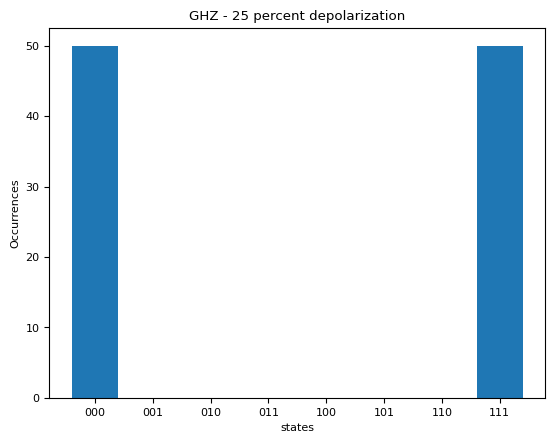

In [7]:
qubits = cirq.NamedQubit.range(3, prefix = "q")
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))

noise = cirq.phase_flip(0.25)

sim = cirq.Simulator()

result = sim.run(circuit.with_noise(noise), repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "GHZ - 25 percent depolarization", xlabel = "states", ylabel = "Occurrences", tick_label = binary_labels(3))
plt.show()


Simulating a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping throughout the whole circuit.

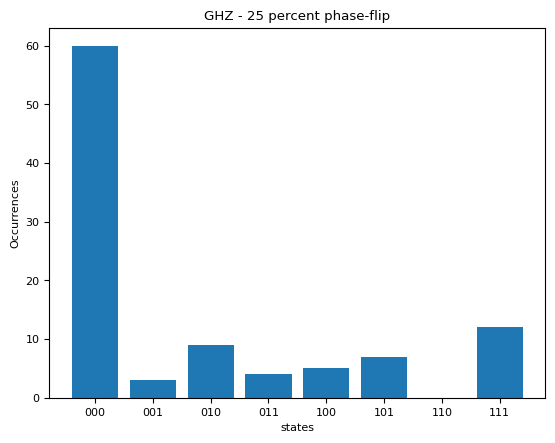

In [8]:
qubits = cirq.NamedQubit.range(3, prefix = "q")
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))

noise = cirq.amplitude_damp(0.25)

sim = cirq.Simulator()

result = sim.run(circuit.with_noise(noise), repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "GHZ - 25 percent phase-flip", xlabel = "states", ylabel = "Occurrences", tick_label = binary_labels(3))
plt.show()

Simulating a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping *only* before the first gate, on all qubits.

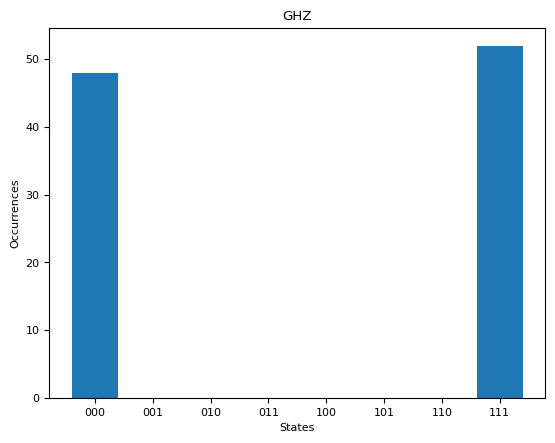

In [9]:
noise = cirq.amplitude_damp(0.25)

qubits = cirq.NamedQubit.range(3, prefix = "q")
circuit = cirq.Circuit()

circuit.append(noise.on_each(qubits))
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))
circuit.append(cirq.measure(qubits))


sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "GHZ", xlabel = "States", ylabel = "Occurrences", tick_label = binary_labels(3))
plt.show()

Simulating a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping *only* between the H and the CNOT gates, on all qubits.

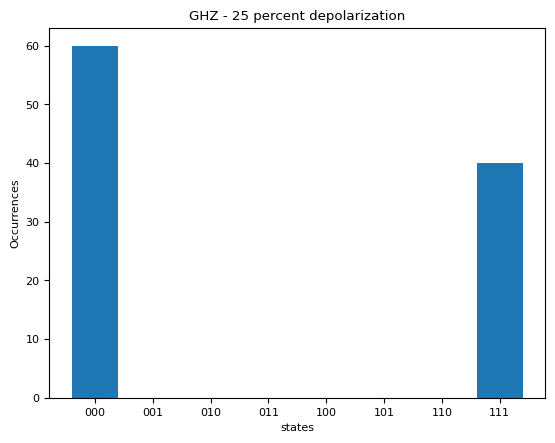

In [10]:
noise = cirq.amplitude_damp(0.25)

qubits = cirq.NamedQubit.range(3, prefix = "q")
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(noise.on_each(qubits))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))

sim = cirq.Simulator()

result = sim.run(circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "GHZ - 25 percent depolarization", xlabel = "states", ylabel = "Occurrences", tick_label = binary_labels(3))
plt.show()

Simulating a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping *only* between the the CNOT gates, on all qubits.

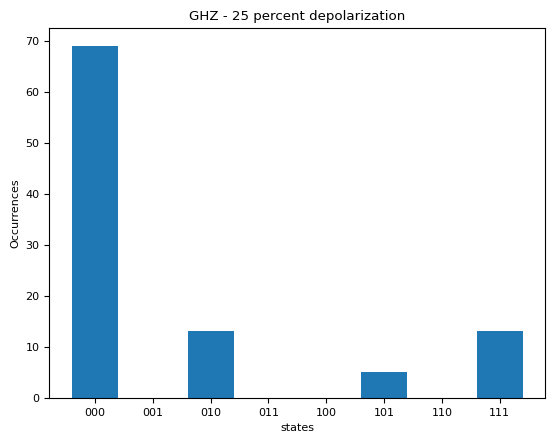

In [11]:
noise = cirq.amplitude_damp(0.25)

qubits = cirq.NamedQubit.range(3, prefix = "q")
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(noise.on_each(qubits))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))

sim = cirq.Simulator()

result = sim.run(circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "GHZ - 25 percent depolarization", xlabel = "states", ylabel = "Occurrences", tick_label = binary_labels(3))
plt.show()

Simulating a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping *only* after the CNOT gates, on all qubits.

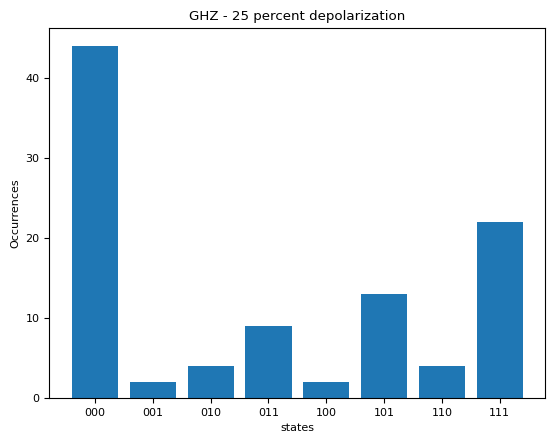

In [12]:
noise = cirq.amplitude_damp(0.25)

qubits = cirq.NamedQubit.range(3, prefix = "q")
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))
circuit.append(noise.on_each(qubits))

circuit.append(cirq.measure(qubits))

sim = cirq.Simulator()

result = sim.run(circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "GHZ - 25 percent depolarization", xlabel = "states", ylabel = "Occurrences", tick_label = binary_labels(3))
plt.show()

Calculating the fidelity of preparing the $|+\rangle$ state without noise and with amplitude damping for a range of probabilities from 0 to 1. Then plotted the results against the given theoretical values.


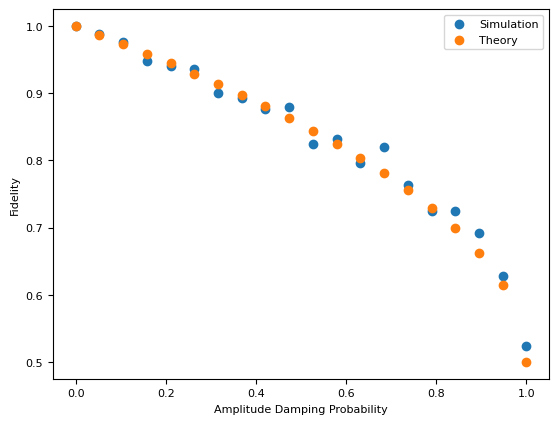

In [13]:
noise_probabilities = np.linspace(0, 1, 20)


fidelities = []
for prob in noise_probabilities:
  # 1. Prepare Qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.H(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.H(q1))

  noise = cirq.amplitude_damp(prob)
  circuit = circuit_0 + circuit_1.with_noise(noise)


  # 2. Swap Test Circuit

  circuit.append(cirq.H(ancilla))
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  circuit.append(cirq.H(ancilla))

  circuit.append(cirq.measure(ancilla))

  # 3. Run Circuit
  sim = cirq.Simulator()
  result = sim.run(circuit, repetitions = 500)

  # 4. Calculate Fidelity
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  fidelities += [fidelity]



# PLOT THE RESULTS
#==================
plt.scatter(noise_probabilities, fidelities, label = 'Simulation')

# These theoretical values only apply to amplitude damping on a single qubit
theoretical_fidelities = [1/2*(1 + (1 - p)**(1/2)) for p in noise_probabilities]
plt.scatter(noise_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Amplitude Damping Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()

Now we perform the same experiment, but assuming noise is on the whole swap test circuit. In other words, we adjust the code from "Characterizing Noise with a Noisy Swap Test" as needed.

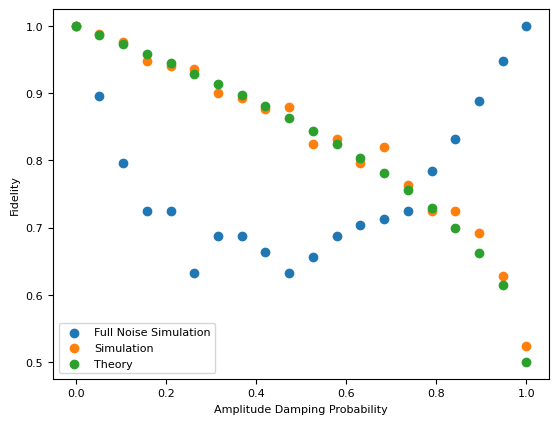

In [14]:
noise_probabilities = np.linspace(0, 1, 20)

noisy_fidelities = []
for prob in noise_probabilities:
  # 1. Prepare Qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.H(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.H(q1))

  noise = cirq.amplitude_damp(prob)
  circuit = circuit_0 + circuit_1


  # 2. Swap Test Circuit

  circuit.append(cirq.H(ancilla))
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  circuit.append(cirq.H(ancilla))

  circuit.append(cirq.measure(ancilla))

  # 3. Run Circuit
  sim = cirq.Simulator()
  result = sim.run(circuit.with_noise(noise), repetitions = 500)

  # 4. Calculate Fidelity
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  noisy_fidelities += [fidelity]




# PLOT THE RESULTS
#==================
plt.scatter(noise_probabilities, noisy_fidelities, label = 'Full Noise Simulation')
plt.scatter(noise_probabilities, fidelities, label = 'Simulation')

# These theoretical values only apply to amplitude damping on a single qubit in the + state
theoretical_fidelities = [1/2*(1 + (1 - p)**(1/2)) for p in noise_probabilities]
plt.scatter(noise_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Amplitude Damping Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()